# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [274]:
import pandas as pd
import zipfile
import geopandas as gpd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
from pylab import get_cmap
import os
import sys

### Downloading and unzipping files of economic census for years 1993-2014

In [225]:
frames = []
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,94,95,96,97,98,99]

for i in range(100):
    
    
    if i in num:
        if i < 10:
            name = 'zbp0' + str(i) + 'totals.zip'
        else:
        
            name = 'zbp' + str(i) + 'totals.zip'
            
        ! curl -o name https://github.com/fedhere/PUI2018_fb55/tree/master/HW12_fb55
        file = zipfile.ZipFile(name)
    
        df = pd.read_csv(file.open(name.replace('.zip','.txt')))
    
    frames.append(df)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91657    0 91657    0     0   250k      0 --:--:-- --:--:-- --:--:--  251k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91657    0 91657    0     0   191k      0 --:--:-- --:--:-- --:--:--  190k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91656    0 91656    0     0   243k      0 --:--:-- --:--:-- --:--:--  243k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91657    0 91657    0     0   180k      0 --:--:-- --:--:-- --:--:--  180k
  % Total    % Received % Xferd  Average Speed   Tim

### The columns of the csv files are not properly named. We need to  set the names common for every file

In [228]:
col1 = ['zip']
col2 = ['est']

for frame in frames:
    if col1 in frame.columns.values:
        frame.rename(columns={'zip': 'ZIP'}, inplace=True)
    
    if col2 in frame.columns.values:
        frame.rename(columns={'est':'EST'}, inplace=True)
        

In [229]:
for frame in frames:
    
    #frame.rename()
    print frame.columns.values

['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST']
['ZIP' 'name' 'empflag' 'emp' 'qp1' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp' 'qp1' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp' 'qp1' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp' 'qp1' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST'
 'city' 'stabbr' 'cty_name']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST'
 'city' 'stabbr' 'cty_name']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST'
 'city' 'stabbr' 'cty_name']
['ZIP' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'EST'
 'city' 'stabbr' 'cty_name']
['ZIP' 'name' 'empflag' 'emp_nf' '

### Concanating every file to one dataframe

In [230]:
data = pd.concat(frames)
data.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,AP,EMP,EMPFLAG,EST,NAME,QP1,ZIP,ap,ap_nf,city,cty_name,emp,emp_nf,empflag,name,qp1,qp1_nf,stabbr
0,0.0,0.0,A,1,"HOLTSVILLE, NY",0.0,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,259661.0,8042.0,NaN,493,"AGAWAM, MA",59833.0,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,169658.0,6547.0,NaN,563,"AMHERST, MA",36719.0,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2482.0,82.0,NaN,13,"AMHERST, MA",308.0,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5826.0,717.0,NaN,48,"AMHERST, MA",2049.0,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
data.shape

(3893359, 18)

### Selecting the zip codes and est columns

In [232]:
data = data[['ZIP', 'EST']]
data.head()

,ZIP,EST
0,501,1
1,1001,493
2,1002,563
3,1003,13
4,1004,48


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



### Merging with the NYC zipcode shapefile to get the data for New York City

In [275]:
shape = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
shape['ZIPCODE'] = shape['ZIPCODE'].astype(int)
shape.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."


In [276]:
dataSeries = shape.merge(data, left_on='ZIPCODE', right_on='ZIP')
dataSeries.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP,EST
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,65
1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,57
2,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,78
3,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,74
4,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",11436,84


### getting the time series for each zip code

In [277]:
zipCodes = {zips:[] for zips in dataSeries.ZIPCODE}

for key in zipCodes.keys():
    
    for i in range(len(dataSeries[(dataSeries.ZIPCODE == key)][['EST']].values)):
        zipCodes[key].append(dataSeries[(dataSeries.ZIPCODE == key)][['EST']].values[i][0])

In [278]:
businessZips = pd.DataFrame.from_dict(zipCodes, orient='index')
businessZips.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
10155,137,134,113,114,112.0,122.0,132.0,141.0,151.0,143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10260,26,27,27,21,14.0,10.0,7.0,6.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10158,50,56,50,51,53.0,57.0,61.0,49.0,52.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10265,2,2,1,2,2.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10196,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
businessZips.shape

(245, 400)

In [280]:
businessZips = businessZips.loc[:, :20]
businessZips['ZIPCODE'] = businessZips.index
businessZips.reset_index(drop=True, inplace=True)
businessZips.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,ZIPCODE
0,137,134,113,114,112.0,122.0,132.0,141.0,151.0,143.0,...,141.0,143.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,10155
1,26,27,27,21,14.0,10.0,7.0,6.0,4.0,3.0,...,15.0,15.0,21.0,24.0,25.0,23.0,NaN,NaN,NaN,10260
2,50,56,50,51,53.0,57.0,61.0,49.0,52.0,55.0,...,47.0,48.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,10158
3,2,2,1,2,2.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,3.0,2.0,4.0,3.0,1.0,NaN,NaN,10265
4,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10196


### Removing the columns with nan values and plotting

In [281]:
businessZips.dropna(inplace=True)

Text(0,0.5,'business counts')

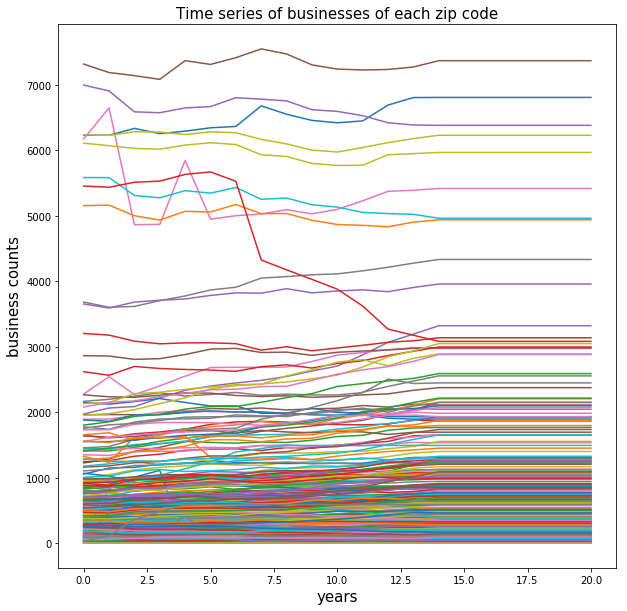

In [282]:
plt.figure(figsize=(10,10))

for i in range(len(businessZips)):
    plt.plot(businessZips.iloc[i, 0:21])
    
plt.title('Time series of businesses of each zip code', fontsize=15)
plt.xlabel('years', fontsize=15)
plt.ylabel('business counts', fontsize=15)

Plot of business counts for every zip code for 1993-2014. There are 238 zip codes in total. Most of the business count lie within 3000 with a handful of them greater than that.

### Standardizing each time series

In [283]:
businessSeries = ((businessZips.iloc[:, :21].T - businessZips.iloc[:, :21].mean(axis=1))/businessZips.iloc[:, :21].std(axis=1)).T
businessSeries['ZIPCODE'] = businessZips.ZIPCODE.values
businessSeries.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,ZIPCODE
0,-0.155387,-0.383047,-1.976667,-1.900781,-2.052554,-1.293687,-0.534820,0.148160,0.907027,0.299933,...,0.148160,0.299933,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,10155
2,-0.326902,1.320685,-0.326902,-0.052304,0.496891,1.595282,2.693674,-0.601500,0.222293,1.046087,...,-1.150696,-0.876098,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,10158
5,1.159522,1.530710,1.382235,1.159522,1.233759,0.788333,0.565620,1.011046,0.639858,0.342907,...,-1.141846,-0.696420,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,10270
6,1.101860,1.332100,0.180902,-0.279577,0.065783,0.065783,0.065783,-0.740056,-1.085415,-1.545894,...,-0.279577,2.483297,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,10271
8,0.773355,1.212286,-0.543439,-1.421301,-0.982370,-1.421301,-1.860232,-1.421301,-1.421301,-0.104507,...,0.334424,0.334424,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,10278


In [284]:
businessSeries.replace([np.inf, -np.inf], np.nan)
businessSeries.dropna(inplace=True)

## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

## K-means with 5 clusters

In [285]:
X = businessSeries.iloc[:, :21]

k = 5

kmeans = KMeans(n_clusters = k, n_init = 100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [286]:
labels_kmeans = kmeans.labels_.astype(np.float) 
#cmap = ListedColormap(['gray', 'red', 'green', 'blue', 'yellow', 'magenta'])

In [287]:
len(labels_kmeans)

238

In [288]:
businessSeries['labels_kmeans'] = labels_kmeans
businessSeries.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,ZIPCODE,labels_kmeans
0,-0.155387,-0.383047,-1.976667,-1.900781,-2.052554,-1.293687,-0.534820,0.148160,0.907027,0.299933,...,0.299933,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,10155,1.0
2,-0.326902,1.320685,-0.326902,-0.052304,0.496891,1.595282,2.693674,-0.601500,0.222293,1.046087,...,-0.876098,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,10158,0.0
5,1.159522,1.530710,1.382235,1.159522,1.233759,0.788333,0.565620,1.011046,0.639858,0.342907,...,-0.696420,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,10270,0.0
6,1.101860,1.332100,0.180902,-0.279577,0.065783,0.065783,0.065783,-0.740056,-1.085415,-1.545894,...,2.483297,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,10271,3.0
8,0.773355,1.212286,-0.543439,-1.421301,-0.982370,-1.421301,-1.860232,-1.421301,-1.421301,-0.104507,...,0.334424,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,10278,4.0


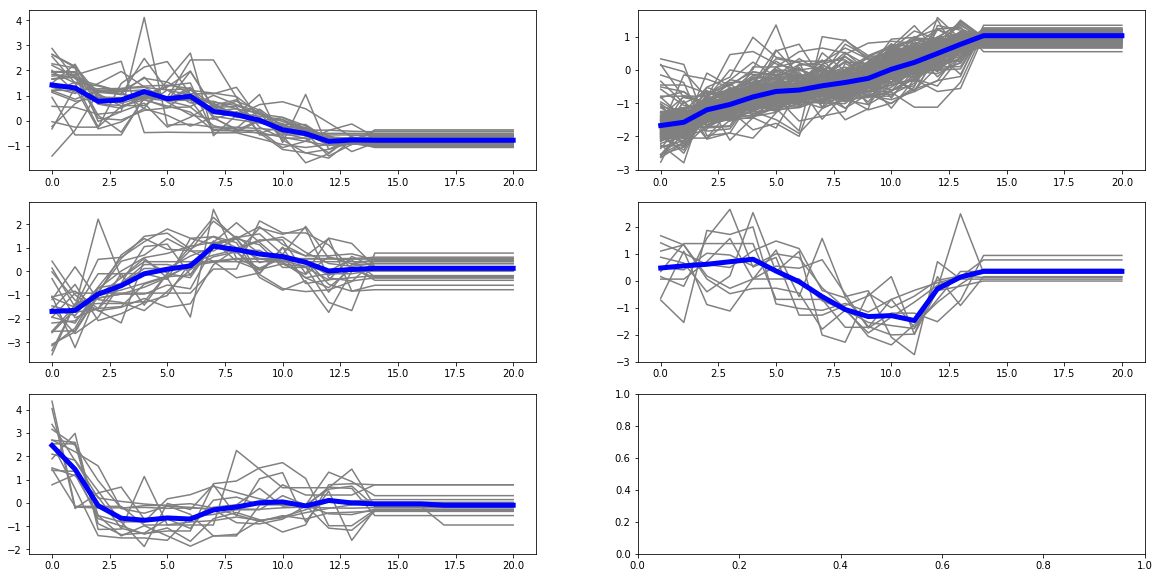

In [289]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))

label = 0
for row in ax:
    
    #for label in businessSeries.labels:
    for col in row:

        for i in range(len(businessSeries[(businessSeries.labels_kmeans == label)])):

            col.plot(businessSeries[businessSeries.labels_kmeans == label].iloc[i, :21], color='gray')
        
        col.plot(businessSeries[businessSeries.labels_kmeans == label].iloc[:, :21].mean(axis=0), color='blue', linewidth=5
                , label=label)
        #col.legend()
        
        if label == 4:
            break
        else:        
            label = label+1

### Time series of each clusters with the mean time series of each cluster plotted in blue. We can see that some clusters have an increasing trend and some decreasing. While others increase and the decrease.

In [290]:
dataSeries = shape.merge(businessSeries, on='ZIPCODE')
dataSeries.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,12,13,14,15,16,17,18,19,20,labels_kmeans
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.158934,0.410829,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.653049,0.924152,1.083074,1.083074,1.083074,1.083074,1.083074,1.083074,1.083074,1.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.674882,0.790199,1.032366,1.032366,1.032366,1.032366,1.032366,1.032366,1.032366,1.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.408936,0.900783,1.127033,1.127033,1.127033,1.127033,1.127033,1.127033,1.127033,1.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,0.501925,0.884534,1.113166,1.113166,1.113166,1.113166,1.113166,1.113166,1.113166,1.0


Text(0.5,1,'K-means with 5 clusters')

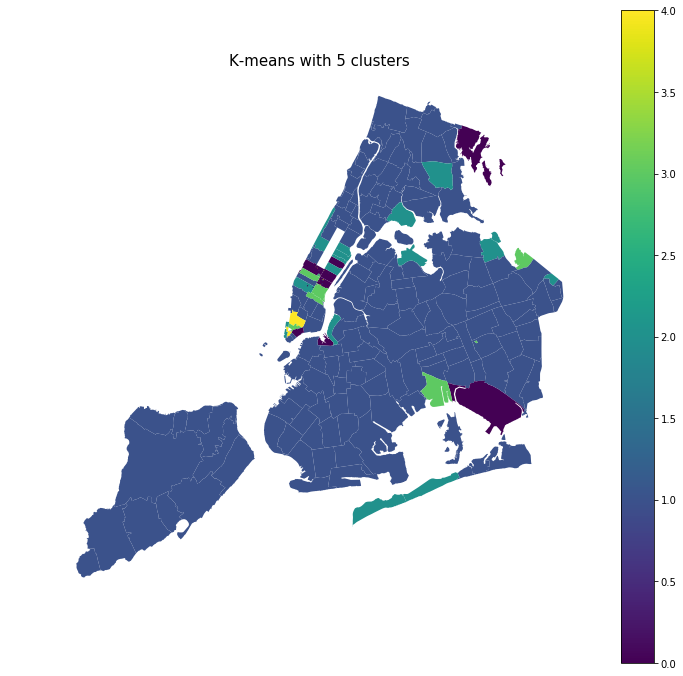

In [291]:
ax = dataSeries.plot(column='labels_kmeans', figsize=(12,12), legend=True)
ax.set_axis_off()
plt.title('K-means with 5 clusters', fontsize=15)

On clustering with 5 clusters, we see that the most of the zips in NYC belong to one cluster. While some outer zips (Airport) have different cluster. Some areas in lower Manhattan have different cluster.

In [292]:
X = businessSeries.iloc[:, :21]

k = 7

kmeans = KMeans(n_clusters = k, n_init = 100)
kmeans.fit(X)

labels_kmeans_7 = kmeans.labels_.astype(np.int) 

businessSeries['labels_kmeans_7'] = labels_kmeans_7
businessSeries.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,ZIPCODE,labels_kmeans,labels_kmeans_7
0,-0.155387,-0.383047,-1.976667,-1.900781,-2.052554,-1.293687,-0.534820,0.148160,0.907027,0.299933,...,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,10155,1.0,0
2,-0.326902,1.320685,-0.326902,-0.052304,0.496891,1.595282,2.693674,-0.601500,0.222293,1.046087,...,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,10158,0.0,1
5,1.159522,1.530710,1.382235,1.159522,1.233759,0.788333,0.565620,1.011046,0.639858,0.342907,...,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,10270,0.0,1
6,1.101860,1.332100,0.180902,-0.279577,0.065783,0.065783,0.065783,-0.740056,-1.085415,-1.545894,...,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,10271,3.0,5
8,0.773355,1.212286,-0.543439,-1.421301,-0.982370,-1.421301,-1.860232,-1.421301,-1.421301,-0.104507,...,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,10278,4.0,0


In [293]:
dataSeries1 = dataSeries.merge(businessSeries, on='ZIPCODE')

Text(0.5,1,'K-means with 7 clusters')

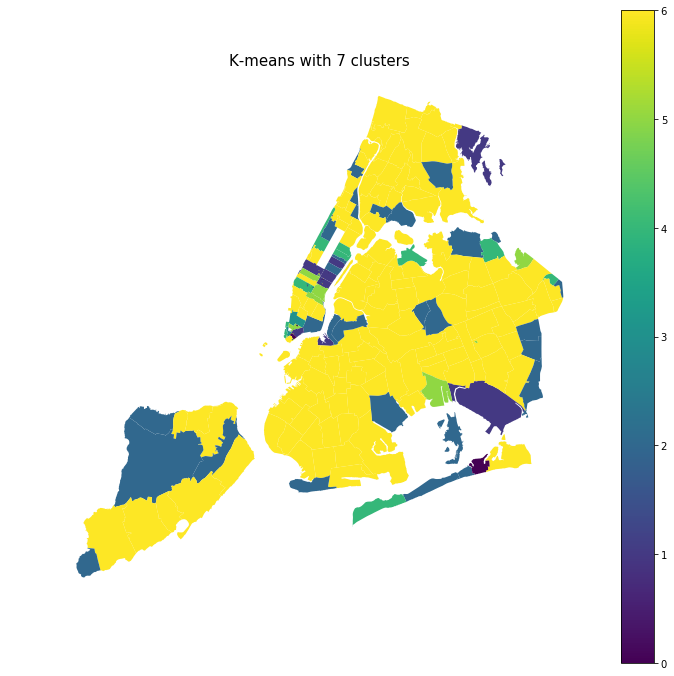

In [294]:
ax = dataSeries1.plot(column='labels_kmeans_7', figsize=(12,12), legend=True)
ax.set_axis_off()
plt.title('K-means with 7 clusters', fontsize=15)

With 7 clusters, some outer zips in Staten island and Queens belong to another cluster. Many areas in Manhattan belong to different clusters.. While most areas in inner Brooklyn, Queens and Bronx belong to same cluster.

Text(0.5,1,'K-means with 3 clusters')

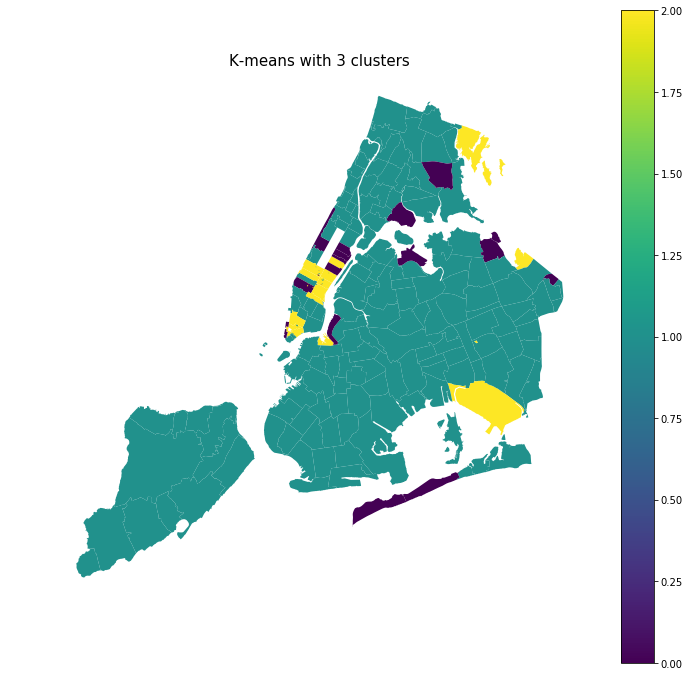

In [295]:
X = businessSeries.iloc[:, :21]

k = 3

kmeans = KMeans(n_clusters = k, n_init = 100)
kmeans.fit(X)

labels_kmeans_3 = kmeans.labels_.astype(np.int) 

businessSeries['labels_kmeans_3'] = labels_kmeans_3

dataSeries2 = dataSeries.merge(businessSeries, on='ZIPCODE')

ax = dataSeries2.plot(column='labels_kmeans_3', figsize=(12,12), legend=True)
ax.set_axis_off()
plt.title('K-means with 3 clusters', fontsize=15)

With 3 clusters, most of the zips in outer boroughs belong to the same cluster. Interesting thing to note is that some outer zips (JFK) and zips in Manhattan belong to the same cluster.

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

## DBSCAN

In [250]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [251]:
labels_db = dbscan.labels_.astype(np.float)

In [252]:
len(labels_db)

238

In [253]:
businessSeries['dbscan_labels'] = labels_db
businessSeries.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,ZIPCODE,labels_kmeans,dbscan_labels
0,-0.155387,-0.383047,-1.976667,-1.900781,-2.052554,-1.293687,-0.534820,0.148160,0.907027,0.299933,...,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,0.831140,10155,0.0,-1.0
2,-0.326902,1.320685,-0.326902,-0.052304,0.496891,1.595282,2.693674,-0.601500,0.222293,1.046087,...,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,-0.601500,10158,1.0,-1.0
5,1.159522,1.530710,1.382235,1.159522,1.233759,0.788333,0.565620,1.011046,0.639858,0.342907,...,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,-0.844895,10270,1.0,-1.0
6,1.101860,1.332100,0.180902,-0.279577,0.065783,0.065783,0.065783,-0.740056,-1.085415,-1.545894,...,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,0.296022,10271,3.0,-1.0
8,0.773355,1.212286,-0.543439,-1.421301,-0.982370,-1.421301,-1.860232,-1.421301,-1.421301,-0.104507,...,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,0.773355,10278,2.0,-1.0


In [254]:
dataSeriesFinal = dataSeries.merge(businessSeries, on='ZIPCODE')
dataSeriesFinal.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,13,14,15,16,17,18,19,20,labels_kmeans,dbscan_labels
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.410829,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,0.0,-1.0
1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.410829,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,0.0,-1.0
2,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.410829,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,0.0,-1.0
3,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.410829,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,0.0,-1.0
4,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.410829,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,1.040568,0.0,-1.0


Text(0.5,1,'DBSCAN')

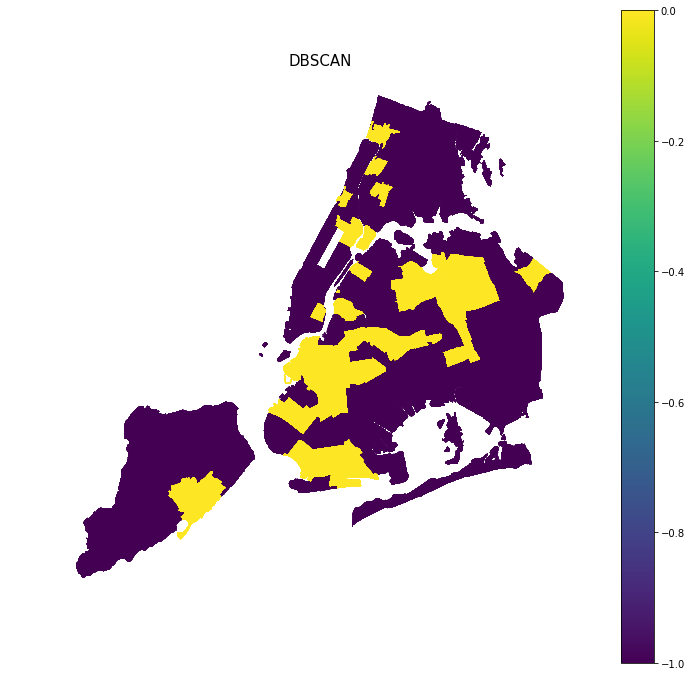

In [266]:
ax = dataSeriesFinal.plot(column='dbscan_labels', figsize=(12,12), legend=True)
ax.set_axis_off()
plt.title('DBSCAN', fontsize=15)

### Density based clustering by DBSAN algorithm divides the city into 2 clusters. Most zips in Brooklyn and Queens belong to the same cluster. This may not be the best method for clustering for this data as 2 clusters do not give much information to differentiate the zips in the city